In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

digits = load_digits()

In [136]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


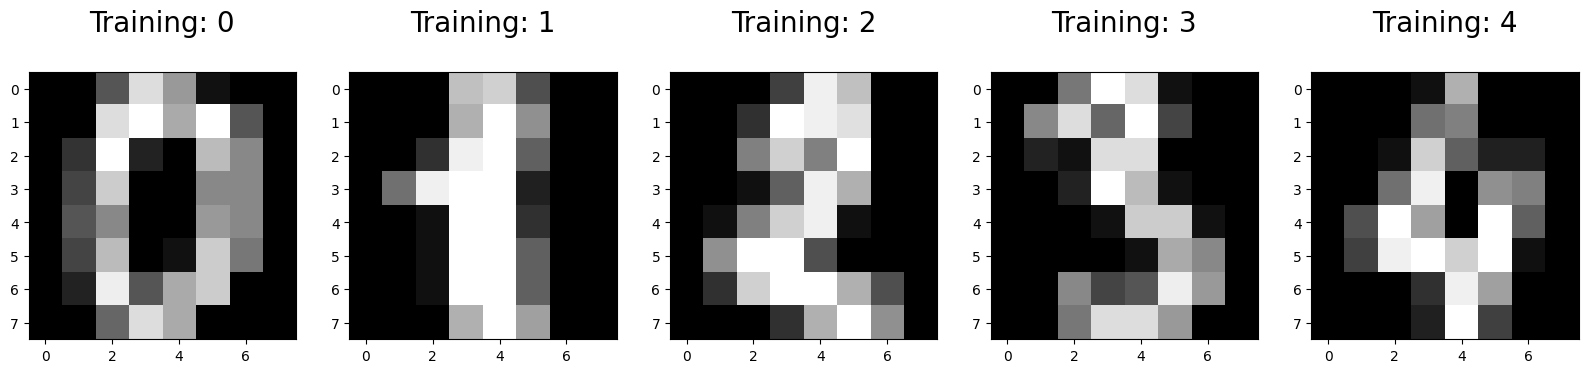

In [137]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [138]:
# Load the MNIST dataset
X, y = digits.data, digits.target

In [139]:
# Reshaping X in 2D arrays
X.reshape(-1,8,8)

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [140]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Purpose of train and test set***

The training set is used to train the model and in this case the model is trained on the 80% of the observations available. The testing set is used to asses the final model's performance on unseen data (in our case 20% of the observations available)

In [141]:
# create random forest classifier
rf = RandomForestClassifier(random_state=42)

In [142]:
# Train the classifier
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [144]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='macro')*100
recall = recall_score(y_test, y_pred, average='macro')*100
f1 = f1_score(y_test, y_pred, average='macro')*100


In [145]:
# Show metrics for basic RF classifier
print('Basic Random Forest Classifier model:')
print('Accuracy: {:.2f} %'.format(accuracy))
print('Precision: {:.2f} %'.format(precision))
print('Recall: {:.2f} %'.format(recall))
print('F1 Score: {:.2f} %'.format(f1))

Basic Random Forest Classifier model:
Accuracy: 97.22 %
Precision: 97.40 %
Recall: 97.27 %
F1 Score: 97.32 %


***Hyper parameter tuning***

We will deploy Gridsearch CV to tune the parameters of number of estimators and maximum depth. This is because deeper classfication trees can capture more complex relationships of the data, but excessive depths can lead to overfitting of the data impacting significantly the predictive accuracy of the model. On the other hand the number of estimators (or number of trees used in the ranodm forest) has a significant impact on the computational effort. In general a higher number of trees increases the performance making predictions more stable, but beyond a certain number the improvement is not significant but the computational effort could be significant. 

In [146]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [200, 350, 400, 450],
    'max_depth': [None, 10, 15, 20]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [200, 350, 400, 450]})

In [147]:
print(grid_search.best_params_) # plotting of the best parameters

{'max_depth': None, 'n_estimators': 400}


From the hyper parameter tuning excersive it seems that the a total of 400 estimator and a max_depth set at None would give us a better performing model .

***Best Random Forest Classifier***

In [148]:
# Define and train the best RF classifier
rf_hp = RandomForestClassifier(n_estimators=400, max_depth=None, random_state=42)
rf_hp.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [149]:
# Making predicitons for the best classifies
y_pred_hp = rf_hp.predict(X_test)

In [150]:
# Evaluate the classifier's performance
accuracy_hp = accuracy_score(y_test, y_pred_hp)*100
precision_hp = precision_score(y_test, y_pred_hp, average='macro')*100
recall_hp = recall_score(y_test, y_pred_hp, average='macro')*100
f1_hp = f1_score(y_test, y_pred_hp, average='macro')*100

In [151]:
# Show metrics for Best RF classifier
print('Best Random Forest Classifier model:')
print('Accuracy: {:.2f} %'.format(accuracy_hp))
print('Precision: {:.2f} %'.format(precision_hp))
print('Recall: {:.2f} %'.format(recall_hp))
print('F1 Score: {:.2f} %'.format(f1_hp))

Best Random Forest Classifier model:
Accuracy: 97.50 %
Precision: 97.67 %
Recall: 97.44 %
F1 Score: 97.52 %


In [152]:
comparison_df = pd.DataFrame({"Metric":["Accuracy", "Precision", "Recall", "F1 Score"], "Basic RF":[accuracy, precision, recall, f1], "HP RF": [accuracy_hp, precision_hp, recall_hp, f1_hp]}).round(2)
comparison_df.head()

,Metric,Basic RF,HP RF
0,Accuracy,97.22,97.50
1,Precision,97.40,97.67
2,Recall,97.27,97.44
3,F1 Score,97.32,97.52


We can see that through  the hyper parameter tuning for number of estimators and max depth we have  achieved a slight improvement in prediction capabilities from the basic random forest model. 

***Confusion Matrix for HP RF model***

In [156]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_pred_hp, y_test)
print (f"confusion matrix: \n {conf_mat}" )


confusion matrix: 
 [[32  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  2  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 1  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 46  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  0 38]]


In [169]:
cm_df = pd.DataFrame(conf_mat)
cm_df.head(15)

,0,1,2,3,4,5,6,7,8,9
0,32,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,2,0
2,0,0,33,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,1,0,0,0,46,0,0,0,0,0
5,0,0,0,1,0,46,1,0,0,1
6,0,0,0,0,0,1,34,0,0,0
7,0,0,0,0,0,0,0,33,0,1
8,0,0,0,0,0,0,0,0,28,0
9,0,0,0,0,0,0,0,1,0,38


From the confusion matrix above we can see that in the test data the model struggles to distinguish between: 
1 and 8 in 2 instancies 
3 and 5 in 1 instance
6 and 5 in 1 instance 
9 and 5 in 1 instance 
9 and 7 in 1 instance 

from this assessment it transpires that the model struggles the most with the number class 5. 

***Optional - visualise some samples and predicted labels***

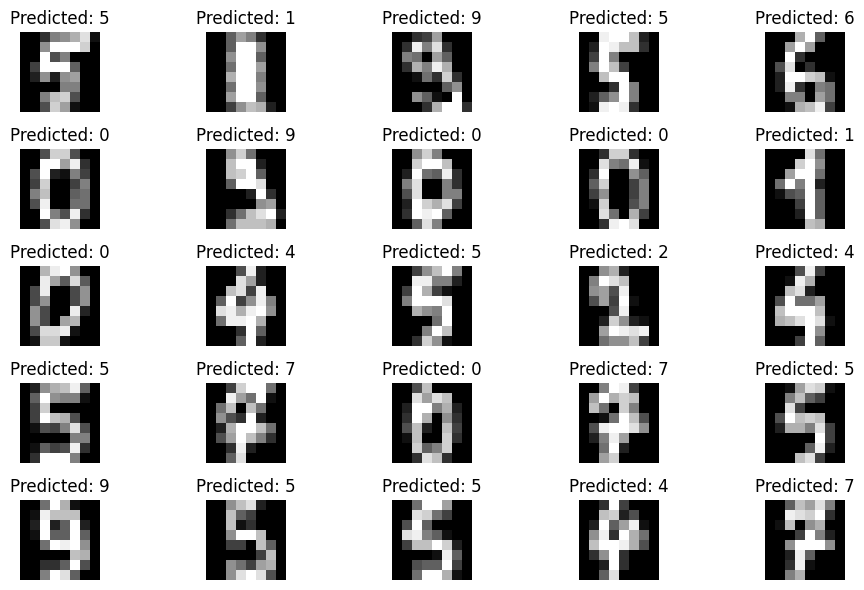

In [175]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    image = X_test[i+50].reshape(8, 8)
    predicted_label = y_pred_hp[i+50]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn

<Axes: >

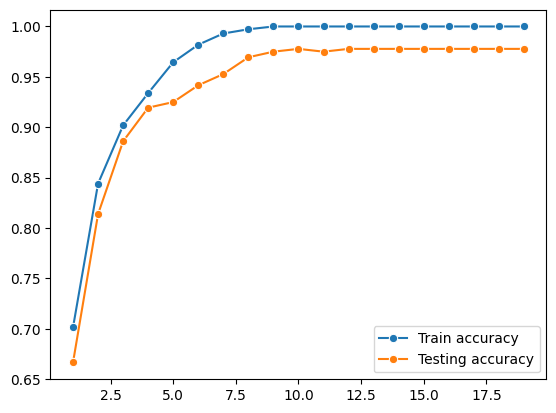

In [153]:
tree_depth = range(1,  20) # tree depth range
train_score = [] # train score list
test_score = [] # trest score list
# function to iterate score for each depth step and store the score
for i in tree_depth:
    clf = RandomForestClassifier(max_depth=i, random_state=1)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    train_score.append(tr_score)
    te_score = clf.score(X_test, y_test)
    test_score.append(te_score)

# sns line plot of the score 
sns.lineplot(x = tree_depth, y = train_score, marker='o', label = 'Train accuracy')
sns.lineplot(x = tree_depth, y = test_score, marker='o', label = 'Testing accuracy')

In [154]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

NameError: name 'rf_classifier' is not defined